In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import astropy.wcs as wcs

import sys

import os

# CAN ALSO WORK WITH PYPATH
sys.path.insert(0,'libraries/')
import ratio_density as rat
from image import Astro_Image
from image import ColDens_Image

In [2]:
#### INPUT ####

## for the fits files to open
file_name_1 = 'Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10'
path_1 = '../data/ALMA/fitting_results/'
label_1 = 'C$^{18}$O(2-1)'

file_name_2 = 'Ipeak_4sigmaMusca_C18O10_TP_kelvin'
path_2 = '../data/ALMA/fitting_results/'
label_2 = 'C$^{18}$O(1-0)'

file_name_cont = 'musca_coldens_high250_clean_2d'
path_cont = '../data/Herschel/'
label_cont = 'N$_{H_{2}}$ (cm$^{-2}$)'

## contour information
levs_cont = [2.0e21 + i*1.0e21 for i in range(0,6)]
wids_cont = [0.7 for lev in levs_cont]

## information to map density with constraints from Herschel
file_name_colDens = 'musca_coldens_high250_clean_2d'
path_colDens = '../data/Herschel/'
label_colDens = 'N$_{H_{2}}$ (cm$^{-2}$)'

file_name_Tdust = 'musca_temp_r500_clean_2d'
path_Tdust = '../data/Herschel/'
label_Tdust = 'T$_{dust}$ (K)'

## plotting information
label_map = 'T$_{C^{18}O(2-1)}$/T$_{C^{18}O(1-0)}$'
x1_pl = 60.
x2_pl = 300.
y1_pl = 25.
y2_pl = 345.
max_colDens = 5.5e21

## information for the density calculation (fixed mol. col. density, linewidth and kinetic temperature)
mol = 'c18o'
line_1 = '2-1'
line_2 = '1-0'
fwhm = '0p25'
fit_order = 4 ## order of the polynomial that will be fitted
min_dens = 1e3
max_dens = 1e4
label_density = "n$_{H_{2}}$ (cm$^{-3}$)"
c18o_abundance = 1./(7.3*60*1e4)
#print(c18o_abundance)
grid_path = '../Radex/bin/results/smallGrid-FWHM=0p25'

In [3]:
## open the fits files
hdu = pyfits.open(path_1 + file_name_1 + '.fits')
hdu.info()
data_1 = hdu[0].data
header_1 = hdu[0].header
w_1 = wcs.WCS(header_1)

hdu = pyfits.open(path_2 + file_name_2 + '.fits')
hdu.info()
data_2 = hdu[0].data
header_2 = hdu[0].header
w_2 = wcs.WCS(header_2)

hdu_3 = pyfits.open(path_cont + file_name_cont + '.fits')
hdu_3.info()

hdu_N = pyfits.open(path_colDens + file_name_colDens + '.fits')
hdu_N.info()
data_N = hdu_N[0].data
header_N = hdu_N[0].header

hdu_T = pyfits.open(path_Tdust + file_name_Tdust + '.fits')
hdu_T.info()
data_T = hdu_T[0].data
header_T = hdu_T[0].header

Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     101   (360, 385)   float64   
Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O10_TP_kelvin.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      79   (360, 385)   float64   
Filename: ../data/Herschel/musca_coldens_high250_clean_2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (2800, 3800)   float32   
Filename: ../data/Herschel/musca_coldens_high250_clean_2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (2800, 3800)   float32   
Filename: ../data/Herschel/musca_temp_r500_clean_2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (2800, 3800)   float32   


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
## remove data not present in other map
data_1[np.isnan(data_2)] = np.nan
data_2[np.isnan(data_1)] = np.nan

In [5]:
## calculate the ratio map
map_ratio = rat.ratio_map(data_1, data_2, header_1)

In [6]:
## create Astro/ColDens images
im_colDens = ColDens_Image(data_N, header_N)
im_Tdust = Astro_Image(data_T, header_T)

## reproject Herschel maps to the grid of the spectral line data and save it as an Astro/ColDens_Image
im_colDens_rep = im_colDens.reproject_image(header_1)
im_Tdust_rep = im_Tdust.reproject_image(header_1)

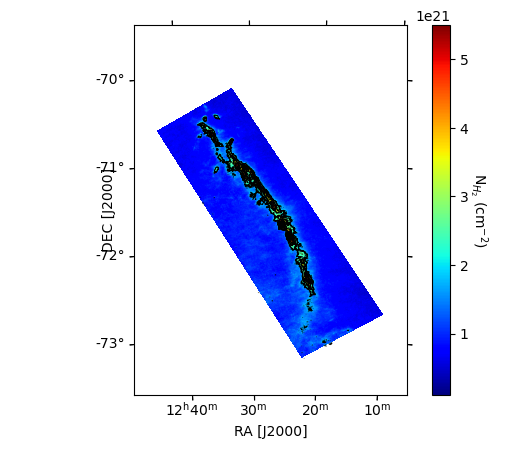

In [7]:
## plot the column density map
im_colDens.plot_image(label_colDens, max_val=max_colDens, contour_hdu = hdu_3, levs_cont = levs_cont, wids_cont = wids_cont)

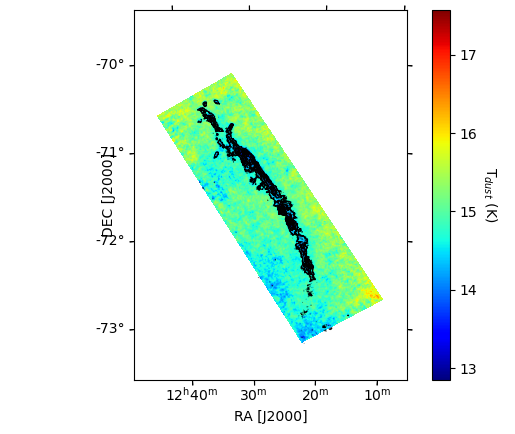

In [8]:
## plot the dust temperature map
im_Tdust.plot_image(label_Tdust, contour_hdu = hdu_3, levs_cont = levs_cont, wids_cont = wids_cont)

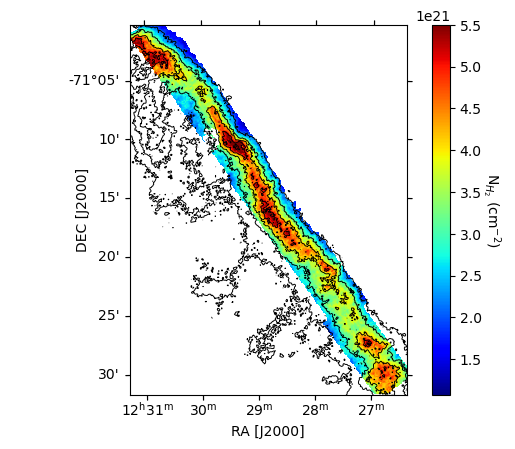

In [9]:
## filter the Herschel images based on the ALMA images mask
mask = np.zeros((len(data_1),len(data_1[0])), dtype=int)
mask[np.isnan(data_1)] = 1
im_colDens_rep.mask_values(mask)
im_Tdust_rep.mask_values(mask)

## verify
im_colDens_rep.plot_image(label_colDens, max_val=max_colDens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont)

0.25544756297728
37.9249236115456


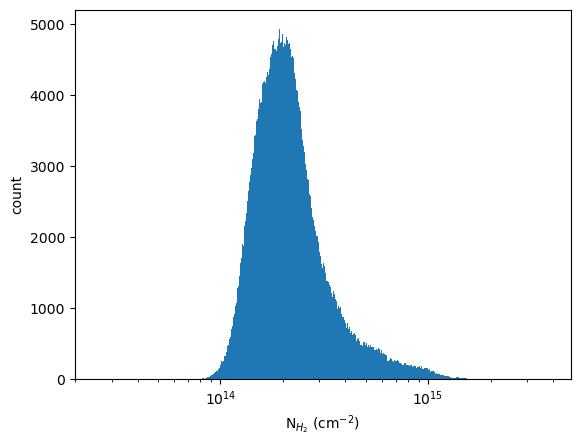

In [10]:
## inspect the column density range of the map for C18O
min_colDens, max_colDens = im_colDens.get_mol_colDens_range(c18o_abundance)
print(min_colDens/1e14)
print(max_colDens/1e14)

im_colDens.histogram_mol_colDens(c18o_abundance, label_colDens, log_xscale_bool = True)

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


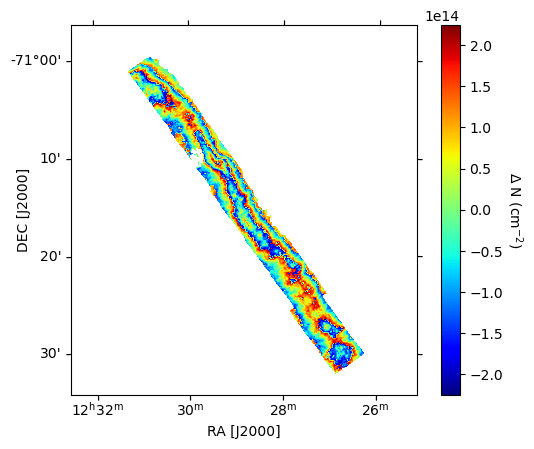

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


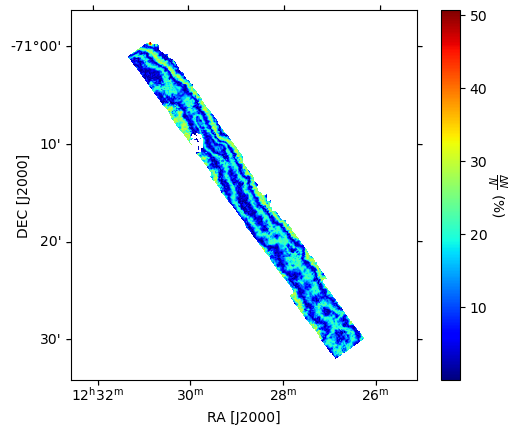

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


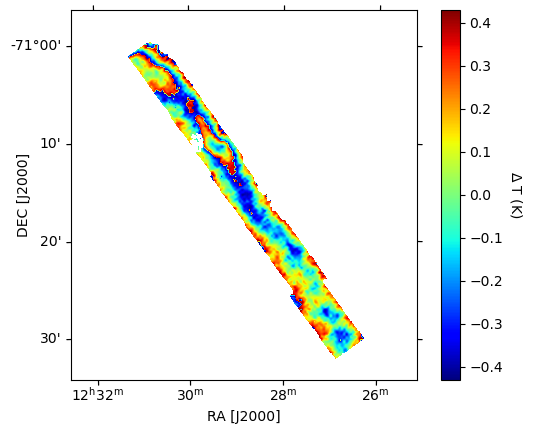

Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


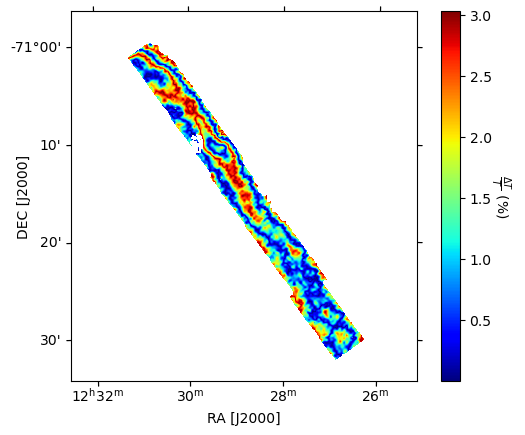

['../Radex/bin/results/smallGrid-FWHM=0p25/c18o_1-0_16p0e14.dat', '../Radex/bin/results/smallGrid-FWHM=0p25/c18o_2-1_16p0e14.dat']
     T_ratio   nH2  Tkin
0   5.267638  2.00   6.0
1   5.169032  2.05   6.0
2   5.065235  2.10   6.0
3   4.959165  2.15   6.0
4   4.846296  2.20   6.0
..       ...   ...   ...
56  1.426505  4.80   6.0
57  1.421326  4.85   6.0
58  1.417002  4.90   6.0
59  1.413517  4.95   6.0
60  1.410051  5.00   6.0

[61 rows x 3 columns]
    index   T_ratio   nH2  Tkin
0       0  5.267638  2.00   6.0
1       1  5.169032  2.05   6.0
2       2  5.065235  2.10   6.0
3       3  4.959165  2.15   6.0
4       4  4.846296  2.20   6.0
..    ...       ...   ...   ...
56     56  1.426505  4.80   6.0
57     57  1.421326  4.85   6.0
58     58  1.417002  4.90   6.0
59     59  1.413517  4.95   6.0
60     60  1.410051  5.00   6.0

[61 rows x 4 columns]
      T_ratio   nH2   Tkin
61   5.032508  2.00  6.372
62   4.938479  2.05  6.372
63   4.839323  2.10  6.372
64   4.738117  2.15  6.372
65  

In [11]:
# SEND IMAGES ALONG INSTEAD OF THE COLUMN DENSITY
map_ratio.get_density_ratio_from_colDens_and_abundance(mol, line_1, line_2, fwhm, c18o_abundance, im_colDens_rep, im_Tdust_rep, grid_path, poly_order = fit_order)